In [244]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, mutual_info_regression, mutual_info_classif, VarianceThreshold
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score

In [245]:
df = pd.read_csv('Data/Pipeline_data_toy.csv', index_col=[0])
#df = pd.read_csv('Data/Pipeline_data.csv', index_col=[0])

df.head()

,bmi,cigs_before_preg,birthweight_g,birth_time,m_deliveryweight,f_age,m_age,m_height_in,num_prenatal_visits,prior_births_dead,...,infections,m_morbidity,riskf,payment,mn_prenatalcare_began,delivery_method,res_status,prev_cesarean,infant_sex,weight_change
0,46.3,0.0,2183.0,1341.0,310.0,27.499772,25.0,64.0,18.0,0.0,...,0.0,0.0,1.0,1.0,2.0,1.0,1.0,0.0,1.0,40.0
1,25.5,0.0,3280.0,621.0,179.0,19.738769,16.0,65.0,6.0,0.0,...,1.0,0.0,0.0,1.0,6.0,1.0,2.0,0.0,0.0,26.0
2,21.8,0.0,2410.0,741.0,154.0,27.000000,24.0,63.0,15.0,0.0,...,0.0,0.0,0.0,2.0,2.0,1.0,1.0,0.0,1.0,31.0
3,22.7,0.0,3544.0,750.0,150.0,31.000000,28.0,62.0,16.0,0.0,...,0.0,0.0,1.0,1.0,3.0,2.0,1.0,1.0,0.0,26.0
4,34.0,3.0,2778.0,1423.0,192.0,28.000000,31.0,63.0,8.0,0.0,...,0.0,0.0,0.0,1.0,2.0,1.0,1.0,0.0,1.0,0.0


In [246]:
df = df[df['birthweight_g']<=7500]

In [247]:
X = df.drop(['birthweight_g'], axis=1)
y = df['birthweight_g']

* Variance Threshold used to remove features with low variance 

In [240]:
selector = VarianceThreshold(threshold = 0.1)
X_new = selector.fit_transform(X)

In [241]:
X_new.shape

(10000, 33)

In [242]:
X.columns

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_dead',
       'prior_births_living', 'prior_terminations', 'prepreg_weight',
       'num_prev_cesareans', 'time_since_menses', 'birth_attendant',
       'birth_place', 'birth_mn', 'birth_dy', 'f_education', 'f_hispanic',
       'f_race6', 'gonorrhea', 'labour_induced', 'm_nativity', 'm_education',
       'm_hispanic', 'admit_icu', 'm_race6', 'm_transferred', 'infections',
       'm_morbidity', 'riskf', 'payment', 'mn_prenatalcare_began',
       'delivery_method', 'res_status', 'prev_cesarean', 'infant_sex',
       'weight_change'],
      dtype='object')

In [243]:
features = X.columns
features[selector.get_support()]

Index(['bmi', 'cigs_before_preg', 'birth_time', 'm_deliveryweight', 'f_age',
       'm_age', 'm_height_in', 'num_prenatal_visits', 'prior_births_living',
       'prior_terminations', 'prepreg_weight', 'num_prev_cesareans',
       'time_since_menses', 'birth_attendant', 'birth_place', 'birth_mn',
       'birth_dy', 'f_education', 'f_hispanic', 'f_race6', 'labour_induced',
       'm_nativity', 'm_education', 'm_hispanic', 'm_race6', 'riskf',
       'payment', 'mn_prenatalcare_began', 'delivery_method', 'res_status',
       'prev_cesarean', 'infant_sex', 'weight_change'],
      dtype='object')

* Feature selection

In [ ]:
fs = SelectKBest(score_func=mutual_info_regression, k=10)
X_new = fs.fit_transform(X, y)

In [ ]:
features = X.columns
features[fs.get_support()]

* Trying FeautureSelector module

In [64]:
from feature_selector import FeatureSelector

ModuleNotFoundError: No module named 'feature_selector'

### Linear Regression

In [248]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [249]:
num_cols = ('bmi','cigs_before_preg','birth_time','m_deliveryweight','f_age','m_age','m_height_in',
            'num_prenatal_visits','prior_births_dead','prior_births_living','prior_terminations','prepreg_weight',
            'num_prev_cesareans','time_since_menses','weight_change','mn_prenatalcare_began')

bin_cols = ('gonorrhea','labour_induced','admit_icu','m_transferred','infections','m_morbidity','riskf',
            'prev_cesarean','infant_sex')

cat_cols = ('birth_attendant','birth_place','birth_mn','birth_dy','f_education','f_hispanic','f_race6',
                'm_nativity','m_education','m_hispanic','m_race6','payment','delivery_method','res_status')

In [250]:
num_transformer = Pipeline(steps=[
        ('scaler', StandardScaler())])

cat_transformer = Pipeline(steps=[
        ('onehot', OneHotEncoder(drop='first'))])


preprocessor = ColumnTransformer(
        remainder='passthrough', #passthough features not listed
        transformers=[
            ('num', num_transformer , num_cols),
            ('cat', cat_transformer , cat_cols)
        ])

In [251]:
X_processed = preprocessor.fit_transform(X)

In [252]:
X_processed = pd.DataFrame(X_processed)

In [253]:
X_processed.head()

,0,1,2,3,4,5,6,7,8,9,...,104,105,106,107,108,109,110,111,112,113
0,2.810418,-0.230973,0.196021,2.893451,-0.594191,-0.695671,-0.049740,1.641846,-0.083903,-0.885747,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.250946,-0.230973,-0.953470,-0.233957,-1.754119,-2.253880,0.310014,-1.326265,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.795515,-0.230973,-0.761888,-0.830791,-0.668885,-0.868806,-0.409494,0.899818,-0.083903,-0.885747,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,-0.663052,-0.230973,-0.747520,-0.926284,-0.071061,-0.176268,-0.769248,1.147161,-0.083903,-0.104459,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
4,1.000092,0.366727,0.326935,0.076396,-0.519429,0.343135,-0.409494,-0.831580,-0.083903,-0.104459,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [269]:
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.2, random_state=0)

In [270]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [271]:
coeff_df = pd.DataFrame(reg.coef_, X_processed.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
0,2.297821e+02
1,-3.083220e+01
2,-1.059730e+01
3,4.009263e+14
4,1.111832e+01
...,...
109,-9.012305e+01
110,5.431158e+01
111,-1.304141e+02
112,2.188877e+02


In [272]:
y_pred = reg.predict(X_test)

In [273]:
test_vs_pred = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
test_vs_pred.head()

,Actual,Predicted
9394,2910.0,3047.160156
898,2620.0,3122.167969
2398,3798.0,3267.050781
5906,3320.0,3153.785156
2343,3997.0,2905.886719


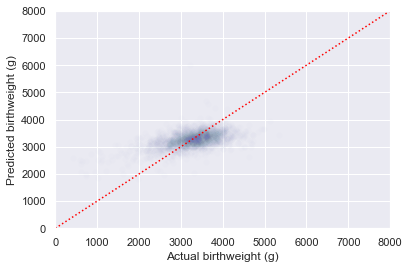

In [274]:
sns.scatterplot(y_test, y_pred, alpha=0.01)
plt.xlabel("Actual birthweight (g)")
plt.ylabel("Predicted birthweight (g)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.plot([0, 8000], [0, 8000], color='red', linestyle='dotted')
plt.show()
#plt.savefig('Results/LinearRegression_noPCA.png')

In [275]:
# Generate predicted values from training set, to compare to those predicted on test (unseen) set. 
y_pred_train = reg.predict(X_train)

print('RMSE of test set:', metrics.mean_absolute_error(y_test, y_pred))
print('R2 of test set  :', round(r2_score(y_test, y_pred), 3))

print('RMSE of training set:', metrics.mean_absolute_error(y_train, y_pred_train))
print('R2 of training set  :', round(r2_score(y_train, y_pred_train), 3))

RMSE of test set: 10037377204.116331
R2 of test set  : -2.9468389728039277e+17
RMSE of training set: 377.21564872288053
R2 of training set  : 0.276


* PCA and then re-try

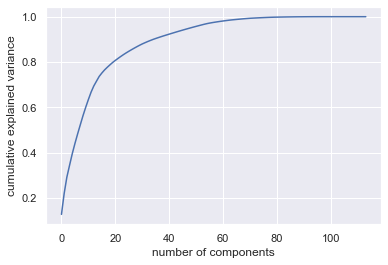

In [276]:
pca = PCA().fit(X_processed)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

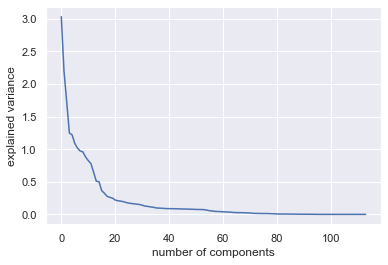

In [277]:
plt.plot(pca.explained_variance_)
plt.xlabel('number of components')
plt.ylabel('explained variance');

In [278]:
pca = PCA(n_components=60)
X_pca = pca.fit_transform(X_processed)

In [279]:
explained_variance = pca.explained_variance_ratio_
sum(explained_variance)*100

97.94001742677284

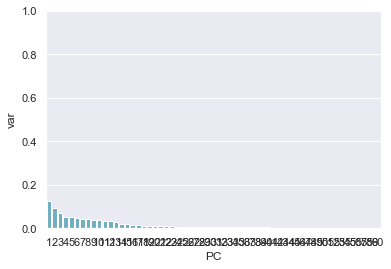

In [280]:
pca_df = pd.DataFrame({'var':explained_variance, 'PC': range(1,61)})

sns.barplot(x='PC', y="var", data=pca_df, color="c").set(ylim=(0, 1));

In [281]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X_pca, y, test_size=0.2, random_state=0)

In [282]:
reg = LinearRegression()
reg.fit(X_train2, y_train2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [283]:
coeff_df = pd.DataFrame(reg.coef_, columns=['Coefficient'])  
coeff_df

,Coefficient
0,39.624715
1,-2.206008
2,97.977439
3,3.108771
4,63.503219
5,-44.950206
6,123.309539
7,8.489917
8,176.321421
9,-18.496787


In [284]:
y_pred2 = reg.predict(X_test2)

In [285]:
test_vs_pred2 = pd.DataFrame({'Actual': y_test2, 'Predicted': y_pred2})
test_vs_pred2.head(20)

,Actual,Predicted
9394,2910.0,3033.112228
898,2620.0,3076.426583
2398,3798.0,3007.173562
5906,3320.0,3147.037621
2343,3997.0,2902.858677
8225,2265.0,2542.242804
5506,2587.0,2808.259648
6451,3070.0,3434.617351
2670,4394.0,3549.913785
3497,3033.0,3792.127917


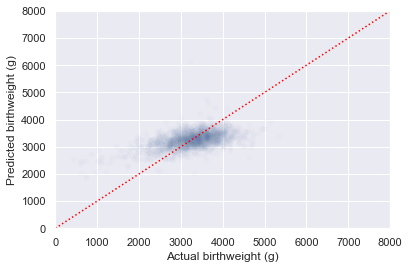

In [286]:
sns.scatterplot(y_test2, y_pred2, alpha=0.02)
plt.xlabel("Actual birthweight (g)")
plt.ylabel("Predicted birthweight (g)")
plt.xlim(0, 8000)
plt.ylim(0, 8000)
plt.plot([0, 8000], [0, 8000], color='red', linestyle='dotted')
plt.show()

In [287]:
# Generate predicted values from training set, to compare to those predicted on test (unseen) set. 
y_pred_train2 = reg.predict(X_train2)

print('RMSE of test set:', metrics.mean_absolute_error(y_test2, y_pred2))
print('R2 of test set  :', round(r2_score(y_test2, y_pred2), 3))

print('RMSE of training set:', metrics.mean_absolute_error(y_train2, y_pred_train2))
print('R2 of training set  :', round(r2_score(y_train2, y_pred_train2), 3))

RMSE of test set: 377.3193239400339
R2 of test set  : 0.274
RMSE of training set: 380.0312334517615
R2 of training set  : 0.264
